# Gaussian Mixture Models and EM

	• Soft Clustering vs Hard Clustering
	• Expectation-Maximization Algorithm
	• Log-Likelihood Maximization and Latent Variables
	• Python: EM Algorithm Implementation

---

### **1. Hard Clustering (e.g., K-Means)**  
**Definition**:  
- Each data point belongs to **exactly one cluster**.  
- Assignments are deterministic (binary membership).  

**Key Properties**:  
- **Algorithm Example**: K-Means.  
- **Mechanism**:  
  - Minimizes within-cluster variance.  
  - Assigns point \( x_i \) to cluster \( C_k \) based on nearest centroid:  
    $$
    C(x_i) = \arg\min_{k} \|x_i - \mu_k\|^2
    $$  
- **Output**: Discrete labels (e.g., Cluster 1, Cluster 2).  

**Pros**:  
- Simple and computationally efficient.  
- Works well with spherical, well-separated data.  

**Cons**:  
- Fails for overlapping clusters or complex geometries.  
- Sensitive to outliers and initial centroid placement.  

---

### **2. Soft Clustering (e.g., Gaussian Mixture Models, GMM)**  
**Definition**:  
- Each data point can belong to **multiple clusters** with probabilistic weights.  
- Assignments reflect uncertainty or partial membership.  

**Key Properties**:  
- **Algorithm Example**: Gaussian Mixture Models (GMM).  
- **Mechanism**:  
  - Models data as a mixture of \( K \) Gaussians.  
  - Computes posterior probability \( P(C_k | x_i) \) for each cluster:  
    $$
    P(C_k | x_i) = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}
    $$  
    where \( \pi_k \) = mixture weight, \( \mathcal{N} \) = Gaussian density.  
- **Output**: Probability vector (e.g., [0.8, 0.2] for 2 clusters).  

**Pros**:  
- Handles overlapping clusters and uncertainty.  
- More flexible for non-spherical data.  

**Cons**:  
- Computationally heavier (requires EM algorithm).  
- Needs tuning of covariance matrices.  

---

### **Key Differences**  
| **Aspect**          | **Hard Clustering**          | **Soft Clustering**            |  
|----------------------|------------------------------|--------------------------------|  
| **Membership**       | Binary (0 or 1)              | Probabilistic ([0, 1])         |  
| **Algorithm**        | K-Means, Hierarchical        | GMM, Fuzzy C-Means             |  
| **Complexity**       | Low (O(n))                  | High (O(nKT), T = iterations)  |  
| **Use Case**         | Clear separation             | Ambiguous or overlapping data  |  

---

### **When to Use Each?**  
- **Hard Clustering**:  
  - Clear cluster boundaries (e.g., customer segmentation).  
  - Speed is critical (large datasets).  
- **Soft Clustering**:  
  - Uncertain or overlapping groups (e.g., topic modeling in text).  
  - Need confidence scores (e.g., anomaly detection).  

**Example**:  
- **K-Means (Hard)**:  
  ```python
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=3).fit(X)
  labels = kmeans.labels_  # Discrete assignments
  ```  
- **GMM (Soft)**:  
  ```python
  from sklearn.mixture import GaussianMixture
  gmm = GaussianMixture(n_components=3).fit(X)
  probs = gmm.predict_proba(X)  # Probability matrix
  ```  

--- 



# Gaussian Mixture Models with Expectation-Maximization

## Overview
A Gaussian Mixture Model (GMM) is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions. The Expectation-Maximization (EM) algorithm is used to estimate the parameters of these Gaussians (means, covariances, and mixing coefficients).

### Key Concepts
- **Mixture Components**: The model assumes $K$ Gaussian components, each with its own mean $\mu_k$, covariance $\Sigma_k$, and mixing coefficient $\pi_k$.
- **Mixing Coefficients**: $\pi_k$ represents the weight of the $k$-th component, where $\sum_{k=1}^K \pi_k = 1$ and $\pi_k \geq 0$.
- **Probability Density**: The probability density of a data point $x_i$ is:
  $$
  p(x_i) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)
  $$
  where $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the Gaussian density:
  $$
  \mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\right)
  $$
  Here, $d$ is the dimensionality of the data.


# Understanding Gaussian Mixture Models (GMMs) for Beginners

## What is a Gaussian Mixture Model?

Imagine you’re at a party with people from different countries, each speaking their own language. The conversations mix together, creating a blend of sounds. If you want to figure out who’s speaking which language, you need to separate the voices. A **Gaussian Mixture Model (GMM)** is like a tool that helps you untangle mixed-up data, assuming the data comes from several groups (like the languages), each following a bell-shaped pattern called a **Gaussian distribution**.

A GMM assumes your data is made up of multiple **Gaussian distributions** (think of them as bell curves). Each Gaussian represents a group or **cluster** in your data. For example, if you’re studying heights of people, one Gaussian might represent short people, another medium, and another tall. The “mixture” part means these groups are blended together, and the GMM helps figure out:
- How many groups (Gaussians) there are.
- The shape and position of each group (mean and spread).
- How much each group contributes to the mix (like how many people speak each language).

Mathematically, a GMM describes the probability of a data point $x_i$ as a weighted sum of $K$ Gaussians:
$$
p(x_i) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)
$$
- $\pi_k$: The weight of the $k$-th Gaussian (how much it contributes).
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$: The Gaussian probability density, which depends on:
  - $\mu_k$: The mean (center of the bell curve).
  - $\Sigma_k$: The covariance (spread or shape of the bell curve).
- $K$: The number of Gaussians (clusters).

The Gaussian density for a data point $x_i$ in $d$ dimensions is:
$$
\mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)\right)
$$
Don’t worry about the formula yet—it just describes a bell curve. The key is that it tells us how likely a data point is to belong to a specific Gaussian.

### Analogy
Think of GMM as a chef trying to reverse-engineer a soup made by mixing several recipes. Each recipe (Gaussian) has its own ingredients (mean and covariance) and portion size (weight). The chef tastes the soup (data) and guesses which recipes were used and in what amounts.

## Key Concepts Explained

### 1. Gaussian Distribution
A Gaussian (or normal distribution) is a bell-shaped curve that describes how data points are spread around a central value (the mean). For example, if you measure the heights of adults, most people are near the average height, with fewer very short or very tall people, forming a bell curve.

In one dimension, a Gaussian is defined by:
- **Mean ($\mu$)**: The center of the curve (e.g., average height).
- **Variance ($\sigma^2$)**: How spread out the data is (how wide the bell is).

In multiple dimensions (e.g., height and weight), we use a **multivariate Gaussian**, which has:
- **Mean vector ($\mu$)**: The center point in multiple dimensions.
- **Covariance matrix ($\Sigma$)**: Describes the spread and how dimensions are related (e.g., are taller people also heavier?).



This code plots a bell curve centered at $\mu=0$ with a standard deviation $\sigma=1$. The curve shows how likely different values are under this Gaussian.

### 2. Mixture Model
A mixture model combines multiple Gaussians. Each Gaussian represents a cluster, and the **mixing coefficients** ($\pi_k$) tell us how much each cluster contributes to the data. For example, if 50% of people are in the “medium height” cluster, then $\pi_{\text{medium}} = 0.5$.

The mixture model says that a data point could come from any of the Gaussians, with probabilities determined by the weights. The total probability is the weighted sum of the Gaussian probabilities.

### 3. Expectation-Maximization (EM) Algorithm
Since we don’t know which data points belong to which Gaussians, or even the parameters of the Gaussians, we use the **EM algorithm** to guess them. It’s like solving a puzzle by iteratively refining your guesses.

The EM algorithm has two steps:
- **Expectation (E-Step)**: Guess which Gaussian each data point belongs to by calculating probabilities (called **responsibilities**).
- **Maximization (M-Step)**: Use those guesses to update the Gaussian parameters (means, covariances, and weights).

#### E-Step: Assigning Responsibilities
For each data point $x_i$ and Gaussian $k$, we calculate the **responsibility** $\gamma_{ik}$, which is the probability that $x_i$ belongs to the $k$-th Gaussian:
$$
\gamma_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$
- The numerator is the probability of $x_i$ coming from Gaussian $k$, weighted by $\pi_k$.
- The denominator sums the probabilities from all Gaussians, ensuring $\sum_{k=1}^K \gamma_{ik} = 1$.

Think of this as assigning a “soft” label to each data point. Instead of saying “this point is definitely in cluster 1,” we say “it’s 70% in cluster 1, 20% in cluster 2, 10% in cluster 3.”

#### M-Step: Updating Parameters
Using the responsibilities, we update:
- **Weights**:
  $$
  \pi_k = \frac{1}{N} \sum_{i=1}^N \gamma_{ik}
  $$
  The weight is the average responsibility for Gaussian $k$ across all $N$ data points.
- **Means**:
  $$
  \mu_k = \frac{\sum_{i=1}^N \gamma_{ik} x_i}{\sum_{i=1}^N \gamma_{ik}}
  $$
  The new mean is a weighted average of the data points, where the weights are the responsibilities.
- **Covariances**:
  $$
  \Sigma_k = \frac{\sum_{i=1}^N \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^N \gamma_{ik}}
  $$
  The covariance measures how the data points vary around the mean, again weighted by responsibilities.

These updates improve the Gaussians to better fit the data.

### 4. Why Use GMMs?
GMMs are powerful because:
- They allow **soft clustering**: A data point can partially belong to multiple clusters.
- They model data as probabilities, which is useful for tasks like anomaly detection or density estimation.
- They can capture complex patterns, like elliptical clusters, unlike simpler methods like K-means.


## Recap: Gaussian Mixture Models and EM Algorithm
A **Gaussian Mixture Model (GMM)** models data as a combination of several Gaussian distributions, each representing a cluster with its own mean ($\mu_k$), covariance ($\Sigma_k$), and mixing coefficient ($\pi_k$). The **Expectation-Maximization (EM) algorithm** estimates these parameters by iterating between two steps:
- **E-Step**: Computes **responsibilities** ($\gamma_{ik}$), the probability that data point $x_i$ belongs to the $k$-th Gaussian.
- **M-Step**: Updates the parameters ($\pi_k$, $\mu_k$, $\Sigma_k$) to maximize the likelihood of the data given the responsibilities.

In this artifact, we’ll focus on the **M-Step** and **Convergence**, explaining them in detail with intuition, math, and code. We’ll also visualize the clusters with covariance ellipses to show the shape of each Gaussian.

## The Maximization Step (M-Step)

### What is the M-Step?
The M-Step updates the GMM parameters to make the data more likely under the model. After the E-Step assigns responsibilities (how much each data point belongs to each Gaussian), the M-Step uses these to adjust:
- **Mixing coefficients** ($\pi_k$): How much each Gaussian contributes to the data.
- **Means** ($\mu_k$): The center of each Gaussian.
- **Covariances** ($\Sigma_k$): The spread and shape of each Gaussian.

The goal is to maximize the **expected log-likelihood** of the data, which measures how well the model fits the data. Think of it as tweaking the recipe for a soup to make it taste as close as possible to the actual soup, using the E-Step’s guesses about which ingredients (Gaussians) are present.

### Mathematical Details
The M-Step maximizes the expected log-likelihood:
$$
Q(\theta, \theta^{\text{old}}) = \sum_{i=1}^N \sum_{k=1}^K \gamma_{ik} \log \left( \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)
$$
where:
- $\theta = \{\pi_k, \mu_k, \Sigma_k\}$ are the parameters to update.
- $\gamma_{ik}$ are the responsibilities from the E-Step.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the Gaussian density.

To maximize $Q$, we take partial derivatives with respect to each parameter, set them to zero, and solve. Here are the updates:

#### 1. Mixing Coefficients ($\pi_k$)
The mixing coefficient $\pi_k$ represents the proportion of the data attributed to the $k$-th Gaussian. The update is:
$$
\pi_k = \frac{1}{N} \sum_{i=1}^N \gamma_{ik}
$$
- **Intuition**: Sum the responsibilities for Gaussian $k$ across all $N$ data points to estimate how much of the data belongs to it, then divide by $N$ to get a proportion.
- **Constraint**: The weights must sum to 1 ($\sum_{k=1}^K \pi_k = 1$), which is ensured by the normalization in the E-Step.

#### 2. Means ($\mu_k$)
The mean $\mu_k$ is the center of the $k$-th Gaussian. The update is:
$$
\mu_k = \frac{\sum_{i=1}^N \gamma_{ik} x_i}{\sum_{i=1}^N \gamma_{ik}}
$$
- **Intuition**: Compute a weighted average of the data points, where the weights are the responsibilities. Points with higher $\gamma_{ik}$ (more likely to belong to Gaussian $k$) pull the mean more strongly.
- **Analogy**: Imagine each data point voting for where the cluster center should be, with votes weighted by how confident the point is in belonging to that cluster.

#### 3. Covariances ($\Sigma_k$)
The covariance matrix $\Sigma_k$ describes the spread and orientation of the $k$-th Gaussian. The update is:
$$
\Sigma_k = \frac{\sum_{i=1}^N \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^N \gamma_{ik}}
$$
- **Intuition**: Calculate how the data points vary around the new mean, weighted by their responsibilities. The term $(x_i - \mu_k)(x_i - \mu_k)^T$ measures the spread in all directions, and responsibilities ensure only relevant points contribute significantly.
- **Why the $T$?**: In multiple dimensions, $(x_i - \mu_k)$ is a vector, and the outer product $(x_i - \mu_k)(x_i - \mu_k)^T$ creates a matrix capturing correlations between dimensions (e.g., does height correlate with weight?).
- **Regularization**: A small term (e.g., $10^{-6} \cdot I$) is often added to $\Sigma_k$ to ensure it’s positive definite (invertible), avoiding numerical issues.

### Why Does This Work?
The M-Step updates are derived by maximizing the likelihood, assuming the responsibilities are fixed. Each update moves the Gaussians to better fit the data points assigned to them, like adjusting the position and shape of a bell curve to cover its points more snugly.



In [1]:
def m_step(self, X, responsibilities):
    n_samples = X.shape[0]
    # Update weights
    Nk = responsibilities.sum(axis=0)  # Sum of responsibilities for each Gaussian
    self.weights_ = Nk / n_samples
    # Update means
    self.means_ = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    # Update covariances
    for k in range(self.n_components):
        diff = X - self.means_[k]
        self.covariances_[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
        self.covariances_[k] += np.eye(X.shape[1]) * 1e-6  # Regularization

### Python Code for M-Step

- **Nk**: The sum of responsibilities for Gaussian $k$, acting as the “effective number” of points in that cluster.
- **Matrix Operations**: Using `np.dot` for efficiency, especially for means and covariances in high dimensions.
- **Regularization**: Adds a small value to the diagonal of $\Sigma_k$ to prevent singularities.

## Convergence in GMMs

### What is Convergence?
Convergence means the EM algorithm has found parameters that don’t change much between iterations, indicating the model fits the data well. The EM algorithm doesn’t guarantee the global best solution, but it improves the **log-likelihood** with each iteration until it stabilizes.

The **log-likelihood** measures how likely the data is under the current model:
$$
\log p(X | \theta) = \sum_{i=1}^N \log \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)
$$
- **Goal**: Maximize this value.
- **Convergence Check**: Stop when the change in log-likelihood between iterations is small (e.g., less than a threshold like $10^{-4}$).

### How EM Ensures Convergence
The EM algorithm guarantees that the log-likelihood never decreases:
- **E-Step**: Computes responsibilities that maximize the expected log-likelihood for the current parameters.
- **M-Step**: Updates parameters to maximize the expected log-likelihood given the responsibilities.

This iterative process increases the log-likelihood until it plateaus, indicating convergence to a **local maximum**. However:
- **Local vs. Global Maximum**: The solution depends on the initial parameters. Poor initialization (e.g., random means far from the data) may lead to a suboptimal solution.
- **Multiple Restarts**: Running EM with different initializations and picking the solution with the highest log-likelihood can help.

### Practical Convergence Criteria
- **Log-Likelihood Difference**: Stop when:
  $$
  |\log p(X | \theta^{(t)}) - \log p(X | \theta^{(t-1)})| < \text{tol}
  $$
  where $\text{tol}$ is a small threshold (e.g., $10^{-4}$).
- **Maximum Iterations**: Stop after a fixed number of iterations (e.g., 100) to avoid infinite loops.
- **Parameter Stability**: Check if parameters ($\mu_k$, $\Sigma_k$, $\pi_k$) change minimally, though log-likelihood is more common.

### Python Code for Convergence
Here’s a snippet showing how convergence is checked in the `fit` method:



In [2]:
def compute_log_likelihood(self, X):
    n_samples = X.shape[0]
    likelihood = np.zeros(n_samples)
    for k in range(self.n_components):
        gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
        likelihood += self.weights_[k] * gaussian.pdf(X)
    return np.sum(np.log(likelihood + 1e-10))  # Avoid log(0)

def fit(self, X):
    self.initialize_parameters(X)
    self.log_likelihoods_ = []
    for iteration in range(self.max_iter):
        # E-step
        responsibilities = self.e_step(X)
        # M-step
        self.m_step(X, responsibilities)
        # Compute and check log-likelihood
        log_likelihood = self.compute_log_likelihood(X)
        self.log_likelihoods_.append(log_likelihood)
        if len(self.log_likelihoods_) > 1 and \
           abs(self.log_likelihoods_[-1] - self.log_likelihoods_[-2]) < self.tol:
            print(f"Converged at iteration {iteration}")
            break


- **Log-Likelihood**: Computed by summing the log of the weighted Gaussian densities for each point.
- **Convergence Check**: Stops if the log-likelihood changes by less than `tol`.
- **Numerical Stability**: Adds a small constant ($10^{-10}$) to avoid taking the log of zero.

## Visualizing Clusters with Covariance Ellipses
To illustrate the M-Step and convergence, we’ll plot the clusters with ellipses showing the shape of each Gaussian’s covariance matrix. This helps visualize how the M-Step adjusts the Gaussians to fit the data.

### Complete Python Implementation
Below is a GMM implementation with a plot that includes:
- Data points colored by cluster.
- Cluster means as red 'x' markers.
- Ellipses representing the 95% confidence interval of each Gaussian’s covariance.


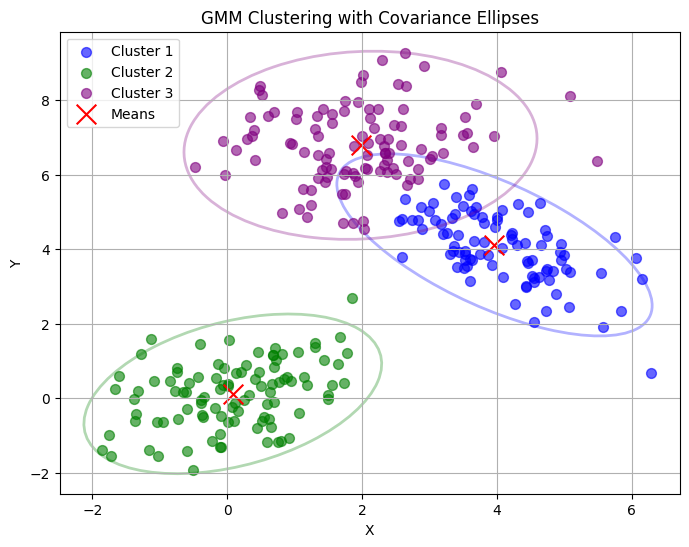

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

class GMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.weights_ = None
        self.means_ = None
        self.covariances_ = None
        self.log_likelihoods_ = []

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        kmeans = KMeans(n_clusters=self.n_components, random_state=0).fit(X)
        self.means_ = kmeans.cluster_centers_
        self.weights_ = np.ones(self.n_components) / self.n_components
        self.covariances_ = np.array([np.cov(X.T) + np.eye(n_features) * 1e-6 
                                     for _ in range(self.n_components)])

    def e_step(self, X):
        n_samples = X.shape[0]
        responsibilities = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
            responsibilities[:, k] = self.weights_[k] * gaussian.pdf(X)
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        return responsibilities

    def m_step(self, X, responsibilities):
        n_samples = X.shape[0]
        Nk = responsibilities.sum(axis=0)
        self.weights_ = Nk / n_samples
        self.means_ = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        for k in range(self.n_components):
            diff = X - self.means_[k]
            self.covariances_[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
            self.covariances_[k] += np.eye(X.shape[1]) * 1e-6

    def compute_log_likelihood(self, X):
        n_samples = X.shape[0]
        likelihood = np.zeros(n_samples)
        for k in range(self.n_components):
            gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
            likelihood += self.weights_[k] * gaussian.pdf(X)
        return np.sum(np.log(likelihood + 1e-10))

    def fit(self, X):
        self.initialize_parameters(X)
        for iteration in range(self.max_iter):
            responsibilities = self.e_step(X)
            self.m_step(X, responsibilities)
            log_likelihood = self.compute_log_likelihood(X)
            self.log_likelihoods_.append(log_likelihood)
            if len(self.log_likelihoods_) > 1 and \
               abs(self.log_likelihoods_[-1] - self.log_likelihoods_[-2]) < self.tol:
                break

    def predict(self, X):
        responsibilities = self.e_step(X)
        return np.argmax(responsibilities, axis=1)

def plot_ellipse(ax, mean, cov, color, alpha=0.3):
    # Compute eigenvalues and eigenvectors for ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Scale for 95% confidence (approx 2 standard deviations)
    scale = np.sqrt(5.991)  # Chi-square value for 2 degrees of freedom
    width, height = 2 * scale * np.sqrt(eigenvalues)
    # Compute angle of rotation
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * 180 / np.pi
    # Create ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                     edgecolor=color, fc='none', lw=2, alpha=alpha)
    ax.add_patch(ellipse)

# Generate synthetic 2D data
np.random.seed(42)
n_samples = 300
X1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], n_samples // 3)
X2 = np.random.multivariate_normal([4, 4], [[1, -0.5], [-0.5, 1]], n_samples // 3)
X3 = np.random.multivariate_normal([2, 7], [[1, 0], [0, 1]], n_samples // 3)
X = np.vstack([X1, X2, X3])

# Fit GMM
gmm = GMM(n_components=3)
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)

# Plot clusters with ellipses
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'purple']
for k in range(gmm.n_components):
    # Plot points for each cluster
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], s=50, alpha=0.6,
                label=f'Cluster {k+1}')
    # Plot covariance ellipse
    plot_ellipse(plt.gca(), gmm.means_[k], gmm.covariances_[k], colors[k])
# Plot means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=200, label='Means')
plt.title('GMM Clustering with Covariance Ellipses')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('gmm_clusters_ellipses.png')



### Plot Description
The output plot (`gmm_clusters_ellipses.png`) shows:
- **Data Points**: Colored by their assigned cluster (blue, green, purple for three clusters).
- **Cluster Means**: Red 'x' markers at the center of each Gaussian.
- **Covariance Ellipses**: Outlines showing the shape and orientation of each Gaussian’s covariance matrix, scaled to represent the 95% confidence region.
- The ellipses visualize how the M-Step shapes each Gaussian to fit the data, with their size and tilt reflecting the covariance.

### Code Highlights
- **Ellipse Plotting**: The `plot_ellipse` function uses the eigenvalues and eigenvectors of the covariance matrix to draw an ellipse. The scale (based on the chi-square distribution) ensures the ellipse covers ~95% of the Gaussian’s probability mass.
- **Convergence**: The `fit` method tracks log-likelihood and stops when it stabilizes, showing how the algorithm converges.
- **M-Step**: Updates are implemented efficiently with matrix operations, and regularization ensures stable covariances.

## Practical Insights
- **M-Step Challenges**:
  - **Singular Covariances**: If too few points are assigned to a Gaussian, $\Sigma_k$ may become non-invertible. Regularization (adding a small diagonal term) helps.
  - **Sensitivity to Initialization**: The M-Step relies on E-Step responsibilities, which depend on initial parameters. K-means initialization (as used here) improves robustness.
- **Convergence Issues**:
  - **Local Maxima**: The algorithm may converge to a suboptimal solution. Multiple runs with different seeds can help.
  - **Slow Convergence**: If clusters overlap significantly, convergence may be slow. Increasing `max_iter` or adjusting `tol` can help.
  - **Numerical Precision**: Small likelihood values can cause numerical issues, hence the $10^{-10}$ in log-likelihood.

## Visualizing Convergence
To further illustrate convergence, let’s plot the log-likelihood over iterations:


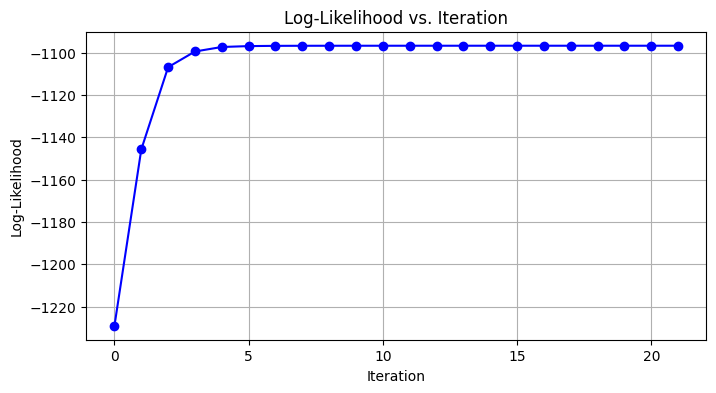

In [4]:
# Add to the previous code, after fitting the GMM
plt.figure(figsize=(8, 4))
plt.plot(gmm.log_likelihoods_, 'b-', marker='o')
plt.title('Log-Likelihood vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.savefig('gmm_log_likelihood.png')


This plot (`gmm_log_likelihood.png`) shows the log-likelihood increasing and plateauing, indicating convergence. It helps visualize how the EM algorithm improves the model fit over time.

## Key Takeaways
- **M-Step**: Updates the GMM parameters to maximize the expected log-likelihood, using responsibilities as weights to adjust means, covariances, and mixing coefficients.
- **Convergence**: The EM algorithm increases the log-likelihood until it stabilizes, typically at a local maximum. Monitoring the log-likelihood helps ensure the model has converged.
- **Visualization**: Covariance ellipses show how the M-Step shapes Gaussians, and log-likelihood plots confirm convergence.

This implementation and visualization provide a clear view of how the M-Step and convergence work together to fit a GMM to data.





## Expectation-Maximization Algorithm
The EM algorithm iteratively optimizes the parameters $\theta = \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$ to maximize the likelihood of the data.

### E-Step (Expectation)
Compute the responsibility (posterior probability) that component $k$ is responsible for data point $x_i$:
$$
\gamma_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$
where $\gamma_{ik}$ represents the probability that $x_i$ belongs to the $k$-th component.

### M-Step (Maximization)
Update the parameters using the responsibilities:
- **Mixing Coefficients**:
  $$
  \pi_k = \frac{1}{N} \sum_{i=1}^N \gamma_{ik}
  $$
- **Means**:
  $$
  \mu_k = \frac{\sum_{i=1}^N \gamma_{ik} x_i}{\sum_{i=1}^N \gamma_{ik}}
  $$
- **Covariances**:
  $$
  \Sigma_k = \frac{\sum_{i=1}^N \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^N \gamma_{ik}}
  $$
where $N$ is the number of data points.

### Convergence
The algorithm iterates between the E-step and M-step until the log-likelihood converges:
$$
\log p(X | \theta) = \sum_{i=1}^N \log \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)
$$





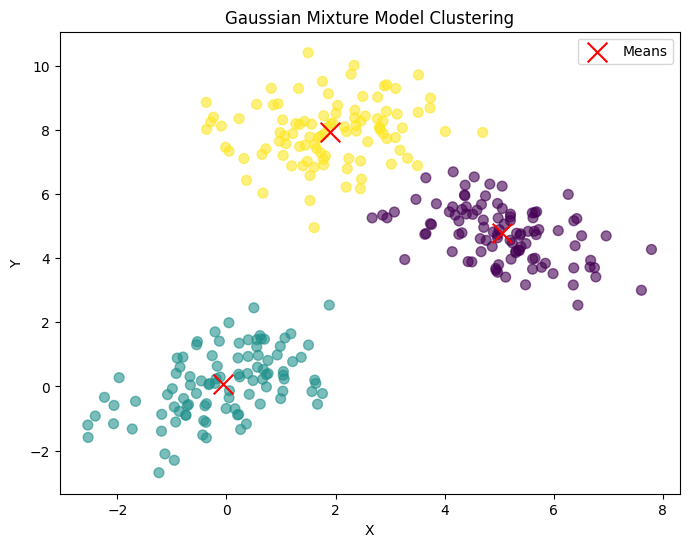

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

class GMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.weights_ = None
        self.means_ = None
        self.covariances_ = None
        self.log_likelihoods_ = []

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        # Initialize with K-means for means
        kmeans = KMeans(n_clusters=self.n_components, random_state=0).fit(X)
        self.means_ = kmeans.cluster_centers_
        # Initialize weights uniformly
        self.weights_ = np.ones(self.n_components) / self.n_components
        # Initialize covariances as identity matrices
        self.covariances_ = np.array([np.cov(X.T) + np.eye(n_features) * 1e-6 
                                     for _ in range(self.n_components)])

    def e_step(self, X):
        n_samples = X.shape[0]
        responsibilities = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
            responsibilities[:, k] = self.weights_[k] * gaussian.pdf(X)
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        return responsibilities

    def m_step(self, X, responsibilities):
        n_samples = X.shape[0]
        # Update weights
        Nk = responsibilities.sum(axis=0)
        self.weights_ = Nk / n_samples
        # Update means
        self.means_ = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        # Update covariances
        for k in range(self.n_components):
            diff = X - self.means_[k]
            self.covariances_[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
            self.covariances_[k] += np.eye(X.shape[1]) * 1e-6  # Regularization

    def compute_log_likelihood(self, X):
        n_samples = X.shape[0]
        likelihood = np.zeros(n_samples)
        for k in range(self.n_components):
            gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
            likelihood += self.weights_[k] * gaussian.pdf(X)
        return np.sum(np.log(likelihood))

    def fit(self, X):
        self.initialize_parameters(X)
        for iteration in range(self.max_iter):
            # E-step
            responsibilities = self.e_step(X)
            # M-step
            self.m_step(X, responsibilities)
            # Compute log-likelihood
            log_likelihood = self.compute_log_likelihood(X)
            self.log_likelihoods_.append(log_likelihood)
            # Check convergence
            if len(self.log_likelihoods_) > 1 and \
               abs(self.log_likelihoods_[-1] - self.log_likelihoods_[-2]) < self.tol:
                break

    def predict(self, X):
        responsibilities = self.e_step(X)
        return np.argmax(responsibilities, axis=1)

# Example usage and visualization
np.random.seed(0)
# Generate synthetic 2D data
n_samples = 300
X1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], n_samples // 3)
X2 = np.random.multivariate_normal([5, 5], [[1, -0.5], [-0.5, 1]], n_samples // 3)
X3 = np.random.multivariate_normal([2, 8], [[1, 0], [0, 1]], n_samples // 3)
X = np.vstack([X1, X2, X3])

# Fit GMM
gmm = GMM(n_components=3)
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=200, label='Means')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig('gmm_clustering.png')


## Explanation of the Code
- **Initialization**: The parameters are initialized using K-means for means, uniform weights, and sample covariance for covariances. A small regularization term ($10^{-6}$) is added to covariances to ensure they are positive definite.
- **E-Step**: Computes responsibilities $\gamma_{ik}$ using the current parameters and the multivariate Gaussian PDF.
- **M-Step**: Updates the weights, means, and covariances based on the responsibilities.
- **Log-Likelihood**: Tracks the log-likelihood to monitor convergence.
- **Visualization**: The synthetic data is plotted with cluster assignments and estimated means.

## Practical Considerations
- **Convergence**: The algorithm stops when the change in log-likelihood is below a threshold (`tol`) or after `max_iter` iterations.
- **Numerical Stability**: Regularization is added to covariances to prevent singularities.
- **Initialization Sensitivity**: K-means initialization helps, but GMM can be sensitive to initial conditions. Multiple restarts may improve results.
- **Choosing $K$**: The number of components can be selected using criteria like BIC or AIC, though this implementation assumes $K$ is given.

## Output
The code generates a plot (`gmm_clustering.png`) showing the data points colored by cluster assignments and the estimated means marked with red 'x' symbols.

This implementation provides a foundation for clustering and density estimation tasks using GMMs.


Iteration 10, weights: [0.31781875 0.33321939 0.34896186]
Iteration 20, weights: [0.32018824 0.3332315  0.34658026]
Iteration 30, weights: [0.32076021 0.33323353 0.34600626]
Iteration 40, weights: [0.32090158 0.33323402 0.34586441]
Iteration 50, weights: [0.32093674 0.33323414 0.34582913]
Iteration 60, weights: [0.3209455  0.33323417 0.34582034]
Iteration 70, weights: [0.32094768 0.33323417 0.34581815]
Iteration 80, weights: [0.32094822 0.33323418 0.3458176 ]
Iteration 90, weights: [0.32094836 0.33323418 0.34581747]


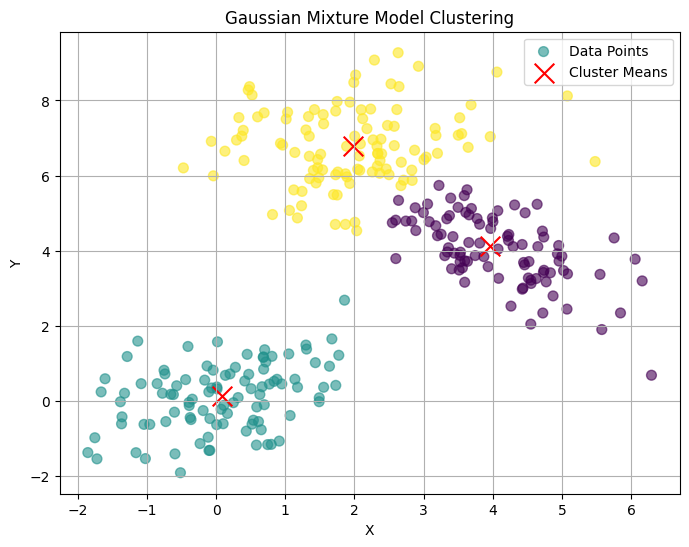

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

class SimpleGMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components  # Number of Gaussians
        self.max_iter = max_iter  # Maximum iterations
        self.tol = tol  # Convergence threshold
        self.weights_ = None  # Mixing coefficients
        self.means_ = None  # Means of Gaussians
        self.covariances_ = None  # Covariances of Gaussians

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        # Use K-means to initialize means
        kmeans = KMeans(n_clusters=self.n_components, random_state=0).fit(X)
        self.means_ = kmeans.cluster_centers_
        # Initialize weights equally
        self.weights_ = np.ones(self.n_components) / self.n_components
        # Initialize covariances as sample covariance
        self.covariances_ = np.array([np.cov(X.T) + np.eye(n_features) * 1e-6 
                                     for _ in range(self.n_components)])

    def e_step(self, X):
        n_samples = X.shape[0]
        responsibilities = np.zeros((n_samples, self.n_components))
        # Calculate probability of each point under each Gaussian
        for k in range(self.n_components):
            gaussian = multivariate_normal(mean=self.means_[k], cov=self.covariances_[k])
            responsibilities[:, k] = self.weights_[k] * gaussian.pdf(X)
        # Normalize to get responsibilities
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        return responsibilities

    def m_step(self, X, responsibilities):
        n_samples = X.shape[0]
        # Update weights
        Nk = responsibilities.sum(axis=0)  # Sum of responsibilities for each component
        self.weights_ = Nk / n_samples
        # Update means
        self.means_ = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        # Update covariances
        for k in range(self.n_components):
            diff = X - self.means_[k]
            self.covariances_[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
            self.covariances_[k] += np.eye(X.shape[1]) * 1e-6  # Regularization

    def fit(self, X):
        self.initialize_parameters(X)
        for iteration in range(self.max_iter):
            # E-step: Compute responsibilities
            responsibilities = self.e_step(X)
            # M-step: Update parameters
            self.m_step(X, responsibilities)
            # Check convergence (simplified)
            if iteration > 0 and iteration % 10 == 0:
                print(f"Iteration {iteration}, weights: {self.weights_}")
            # Stop if max iterations reached
            if iteration == self.max_iter - 1:
                break

    def predict(self, X):
        responsibilities = self.e_step(X)
        return np.argmax(responsibilities, axis=1)

# Generate synthetic 2D data
np.random.seed(42)
n_samples = 300
X1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], n_samples // 3)
X2 = np.random.multivariate_normal([4, 4], [[1, -0.5], [-0.5, 1]], n_samples // 3)
X3 = np.random.multivariate_normal([2, 7], [[1, 0], [0, 1]], n_samples // 3)
X = np.vstack([X1, X2, X3])

# Fit GMM
gmm = SimpleGMM(n_components=3)
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, label='Data Points')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=200, label='Cluster Means')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('gmm_clusters.png')